In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [4]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.25s)
creating index...
index created!


In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
food electronic indoor furniture sports kitchen appliance outdoor accessory vehicle person animal


In [61]:
# get all images containing given categories, select one at random for planes
catIds = coco.getCatIds(catNms=['airplane']);
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[5])[0]
print(img)

{'height': 427, 'flickr_url': 'http://farm7.staticflickr.com/6174/6245331208_9923e02535_z.jpg', 'file_name': '000000071711.jpg', 'id': 71711, 'width': 640, 'license': 3, 'coco_url': 'http://images.cocodataset.org/val2017/000000071711.jpg', 'date_captured': '2013-11-16 02:30:39'}


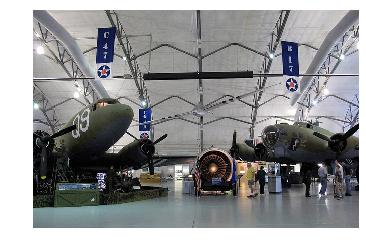

In [62]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

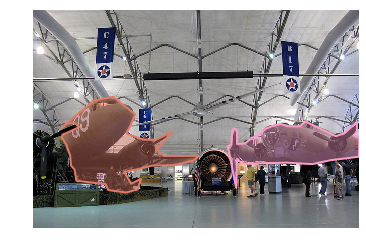

In [63]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [25]:
# get all plane image file_names
catIds = coco.getCatIds(catNms=['airplane']);
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])

print(type(imgIds)) #imgIds is a list
print(len(imgIds)) #with n images
print()
print('IMAGES')
for i in range (0,len(imgIds)):
    img = coco.loadImgs(imgIds[i])[0]
    print(img['file_name'])


#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
#print(img)

<class 'list'>
97

000000208901.jpg
000000090631.jpg
000000525322.jpg
000000452122.jpg
000000400922.jpg
000000071711.jpg
000000013348.jpg
000000513580.jpg
000000408112.jpg
000000524850.jpg
000000039484.jpg
000000379453.jpg
000000502347.jpg
000000114770.jpg
000000579158.jpg
000000196185.jpg
000000205401.jpg
000000281693.jpg
000000139871.jpg
000000396903.jpg
000000044652.jpg
000000410221.jpg
000000442480.jpg
000000300659.jpg
000000167540.jpg
000000323709.jpg
000000545407.jpg
000000110721.jpg
000000520324.jpg
000000383621.jpg
000000553094.jpg
000000567432.jpg
000000478862.jpg
000000404128.jpg
000000456865.jpg
000000388258.jpg
000000479912.jpg
000000272049.jpg
000000469174.jpg
000000052412.jpg
000000214205.jpg
000000463037.jpg
000000504000.jpg
000000381639.jpg
000000459467.jpg
000000183500.jpg
000000348881.jpg
000000190676.jpg
000000098520.jpg
000000137950.jpg
000000001761.jpg
000000575205.jpg
000000493286.jpg
000000134886.jpg
000000099054.jpg
000000144114.jpg
000000477441.jpg
000000425221

In [40]:

img = coco.loadImgs(imgIds[0])[0] #first plane image
print('image height:',img['height'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)

anns = coco.loadAnns(annIds)
#print(anns)
print(anns[0]['bbox']) #print bounding box parameter

#coco.showAnns(anns)


height: 427
[232.67, 148.37, 193.32, 136.22]


file: 000000208901.jpg
image height: 427
planes: 1
[232.67, 148.37, 193.32, 136.22]


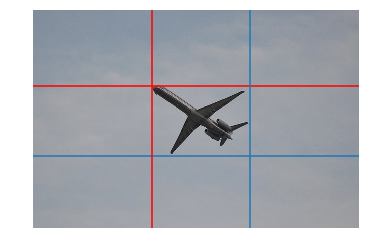

In [66]:
img = coco.loadImgs(imgIds[0])[0] #first plane image
print('file:',img['file_name'])
print('image height:',img['height'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)

anns = coco.loadAnns(annIds)
print('planes:',len(anns))
#print(anns)
bbox = anns[0]['bbox']
print(bbox) #print bounding box parameter


I = io.imread(img['coco_url'])

#horizontal boundaries for single plane
plt.axhline(y=bbox[1],color='r')#top boundary
plt.axhline(y=bbox[3]+bbox[1])#bottom boundary

#vertical boundaries for single plane
plt.axvline(x=bbox[0],color='r')#left boundary
plt.axvline(x=bbox[2]+bbox[0])#right boundary



plt.axis('off')
plt.imshow(I)
plt.show()

In [80]:
print(img)

{'height': 427, 'flickr_url': 'http://farm7.staticflickr.com/6174/6245331208_9923e02535_z.jpg', 'file_name': '000000071711.jpg', 'id': 71711, 'width': 640, 'license': 3, 'coco_url': 'http://images.cocodataset.org/val2017/000000071711.jpg', 'date_captured': '2013-11-16 02:30:39'}


file: 000000071711.jpg
image height: 427
planes: 2


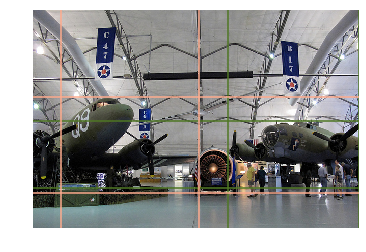

In [74]:
img = coco.loadImgs(imgIds[5])[0] #2 plane
print('file:',img['file_name'])
print('image height:',img['height'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)

anns = coco.loadAnns(annIds)
print('planes:',len(anns))
#print(anns)
bbox = anns[0]['bbox']
bbox2 = anns[1]['bbox']

for i in range(0, len(anns)):
    bbox = anns[i]['bbox']
    plotBoundaries(boundaries(bbox))



I = io.imread(img['coco_url'])

plt.axis('off')
plt.imshow(I)
plt.show()

In [73]:
def boundaries(bbox):
    return {'ymax':bbox[1],'ymin':(bbox[3]+bbox[1]),'xmin':bbox[0],'xmax':(bbox[0]+bbox[2])}
def plotBoundaries(bound):
    c=np.random.rand(3,)
    plt.axhline(bound['ymax'],color=c)
    plt.axhline(bound['ymin'],color=c)
    plt.axvline(bound['xmin'],color=c)
    plt.axvline(bound['xmax'],color=c)

In [91]:
#create xml for an image for 1st plane
from lxml import etree as e

#load image data
img = coco.loadImgs(imgIds[5])[0]

#build xml
root = e.Element('annotation')

folder = e.Element('folder')
folder.text="images"
root.append(folder)

file = e.Element('filename')
file.text=img['file_name']
root.append(file)

size = e.Element('size')
width = e.Element('width')
width.text = str(img['width'])
height = e.Element('height')
height.text = str(img['height'])
depth = e.Element('depth')
depth.text="3"
size.append(width)
size.append(height)
size.append(depth)
root.append(size)

seg = e.Element('segmented')
seg.text = "0"
root.append(seg)

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
for i in range(0,len(anns)):
    #bounding values for one plane
    bbox = anns[i]['bbox']
    bounds = boundaries(bbox)
    
    #Header info for each plane
    obj = e.Element('object')
    name = e.Element('name')
    name.text='plane'
    pose = e.Element('pose')
    pose.text = 'Unspecified'
    truncated = e.Element('truncated')
    truncated.text='0'
    difficult = e.Element('difficult')
    difficult.text='0'
    obj.append(name)
    obj.append(pose)
    obj.append(truncated)
    obj.append(difficult)
    
    #bounding box
    bndbox = e.Element('bndbox')
    xmin = e.Element('xmin')
    xmin.text = str(bounds['xmin'])
    
    ymin = e.Element('ymin')
    ymin.text = str(bounds['ymin'])
    
    xmax = e.Element('xmax')
    xmax.text = str(bounds['xmax'])
    
    ymax = e.Element('ymax')
    ymax.text = str(bounds['ymax'])
    
    bndbox.append(xmin)
    bndbox.append(ymin)
    bndbox.append(xmax)
    bndbox.append(ymax)
    
    obj.append(bndbox)
    
    root.append(obj)

    
    
    
    

#root.append(e.Element('folder'))

s= e.tostring(root,pretty_print=True)
#s=str(e)
print(s)

f=open('output.xml','wb')
f.write(s)
f.close()

b'<annotation>\n  <folder>images</folder>\n  <filename>000000071711.jpg</filename>\n  <size>\n    <width>640</width>\n    <height>427</height>\n    <depth>3</depth>\n  </size>\n  <segmented>0</segmented>\n  <object>\n    <name>plane</name>\n    <pose>Unspecified</pose>\n    <truncated>0</truncated>\n    <difficult>0</difficult>\n    <bndbox>\n      <xmin>381.7</xmin>\n      <ymin>347.72</ymin>\n      <xmax>640.0</xmax>\n      <ymax>217.6</ymax>\n    </bndbox>\n  </object>\n  <object>\n    <name>plane</name>\n    <pose>Unspecified</pose>\n    <truncated>0</truncated>\n    <difficult>0</difficult>\n    <bndbox>\n      <xmin>54.69</xmin>\n      <ymin>357.19</ymin>\n      <xmax>325.29</xmax>\n      <ymax>169.12</ymax>\n    </bndbox>\n  </object>\n</annotation>\n'


In [99]:
#create xml for an image for 1st plane
from lxml import etree as e


def build_xml(i):
    #load image data
    img = coco.loadImgs(imgIds[i])[0]

    #build xml
    root = e.Element('annotation')

    folder = e.Element('folder')
    folder.text="images"
    root.append(folder)

    file = e.Element('filename')
    file.text=img['file_name']
    root.append(file)

    size = e.Element('size')
    width = e.Element('width')
    width.text = str(img['width'])
    height = e.Element('height')
    height.text = str(img['height'])
    depth = e.Element('depth')
    depth.text="3"
    size.append(width)
    size.append(height)
    size.append(depth)
    root.append(size)

    seg = e.Element('segmented')
    seg.text = "0"
    root.append(seg)

    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    for i in range(0,len(anns)):
        #bounding values for one plane
        bbox = anns[i]['bbox']
        bounds = boundaries(bbox)

        #Header info for each plane
        obj = e.Element('object')
        name = e.Element('name')
        name.text='plane'
        pose = e.Element('pose')
        pose.text = 'Unspecified'
        truncated = e.Element('truncated')
        truncated.text='0'
        difficult = e.Element('difficult')
        difficult.text='0'
        obj.append(name)
        obj.append(pose)
        obj.append(truncated)
        obj.append(difficult)

        #bounding box
        bndbox = e.Element('bndbox')
        xmin = e.Element('xmin')
        xmin.text = str(bounds['xmin'])

        ymin = e.Element('ymin')
        ymin.text = str(bounds['ymin'])

        xmax = e.Element('xmax')
        xmax.text = str(bounds['xmax'])

        ymax = e.Element('ymax')
        ymax.text = str(bounds['ymax'])

        bndbox.append(xmin)
        bndbox.append(ymin)
        bndbox.append(xmax)
        bndbox.append(ymax)

        obj.append(bndbox)

        root.append(obj)






    #root.append(e.Element('folder'))

    s= e.tostring(root,pretty_print=True)
    #s=str(e)
    print(s)

    f=open(("{}/xml_outs/" + img['file_name'][0:(len(img['file_name'])-4)]+'.xml').format(dataDir,dataType),'wb')
    f.write(s)
    f.close()


In [100]:
build_xml(0)

b'<annotation>\n  <folder>images</folder>\n  <filename>000000208901.jpg</filename>\n  <size>\n    <width>640</width>\n    <height>427</height>\n    <depth>3</depth>\n  </size>\n  <segmented>0</segmented>\n  <object>\n    <name>plane</name>\n    <pose>Unspecified</pose>\n    <truncated>0</truncated>\n    <difficult>0</difficult>\n    <bndbox>\n      <xmin>232.67</xmin>\n      <ymin>284.59000000000003</ymin>\n      <xmax>425.99</xmax>\n      <ymax>148.37</ymax>\n    </bndbox>\n  </object>\n</annotation>\n'


In [101]:
#build all xmls
for i in range(0,len(imgIds)):
    build_xml(i);

b'<annotation>\n  <folder>images</folder>\n  <filename>000000208901.jpg</filename>\n  <size>\n    <width>640</width>\n    <height>427</height>\n    <depth>3</depth>\n  </size>\n  <segmented>0</segmented>\n  <object>\n    <name>plane</name>\n    <pose>Unspecified</pose>\n    <truncated>0</truncated>\n    <difficult>0</difficult>\n    <bndbox>\n      <xmin>232.67</xmin>\n      <ymin>284.59000000000003</ymin>\n      <xmax>425.99</xmax>\n      <ymax>148.37</ymax>\n    </bndbox>\n  </object>\n</annotation>\n'
b'<annotation>\n  <folder>images</folder>\n  <filename>000000090631.jpg</filename>\n  <size>\n    <width>640</width>\n    <height>389</height>\n    <depth>3</depth>\n  </size>\n  <segmented>0</segmented>\n  <object>\n    <name>plane</name>\n    <pose>Unspecified</pose>\n    <truncated>0</truncated>\n    <difficult>0</difficult>\n    <bndbox>\n      <xmin>176.77</xmin>\n      <ymin>228.17000000000002</ymin>\n      <xmax>457.72</xmax>\n      <ymax>115.73</ymax>\n    </bndbox>\n  </object

In [110]:
#test
from shutil import copyfile
copyfile('{}/images/val2017/000000208901.jpg'.format(dataDir,dataType),'{}/png_outs/000000208901.jpg'.format(dataDir,dataType))


'../png_outs/000000208901.jpg'

In [112]:
#copy all plane images to png_outs
from shutil import copyfile
for i in range (0,len(imgIds)):
    img = coco.loadImgs(imgIds[i])[0]
    png =img['file_name']
    src =('{}/images/val2017/'+ png).format(dataDir,dataType)
    dst =('{}/png_outs/'+png).format(dataDir,dataType)
    copyfile(src,dst)
    

In [ ]:

# get all plane image file_names
catIds = coco.getCatIds(catNms=['airplane']);
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])

print(type(imgIds)) #imgIds is a list
print(len(imgIds)) #with n images
print()
print('IMAGES')
for i in range (0,len(imgIds)):
    img = coco.loadImgs(imgIds[i])[0]
    print(img['file_name'])


#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
#print(img)